In [5]:
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
import os
import numpy as np

In [9]:
def process(path,i,folder):
    image = cv2.imread(path,1)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray,(5,5),0)
    min_x = image.shape[0]
    min_y = image.shape[1]
    max_x = 0
    max_y = 0
    canny = cv2.Canny(blurred,0,250)
    (cnts,_) = cv2.findContours(canny.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    coints = image.copy()
    frame = image.copy()
    cv2.drawContours(frame,cnts,-1,(255,0,0),2)
    for cnt in cnts:
        x ,y,w,h = cv2.boundingRect(cnt)
        area = w * h
        if area > ((image.shape[0] * image.shape[1]) * 0.2):
            if min_x > x:
                min_x = x
            if min_y > y:
                min_y = y
            if max_x < (x + w):
                max_x = x + w
            if max_y < (y + h):
                max_y = y +h
    cv2.rectangle(coints,(min_x,min_y),(max_x,max_y),(0,255,0),2)
    roi = image[min_y:max_y,min_x:max_x]
    roi = cv2.resize(roi,(400,400))
    cv2.imwrite(f"pdataset/{folder}/{i}.jpg",roi)
    plt.imshow(roi)
    

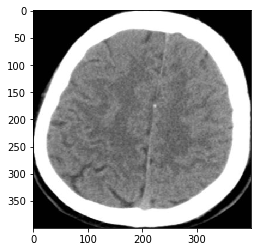

In [10]:
for folder in os.listdir('dataset'):
    for i , each in enumerate(os.listdir(f'dataset/{folder}')):
        process(f'dataset/{folder}/{each}',i,folder)
